In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
income = pd.read_csv(r'Salary_Data.csv')

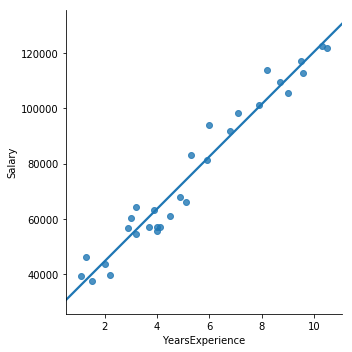

In [3]:
sns.lmplot(x='YearsExperience', y='Salary', data=income, ci=None) #ci confidence interval
plt.show()

In [4]:
# 一元线性回归-公式求参数   y=ax+b
n = income.shape[0]
sum_x = income.YearsExperience.sum()
sum_y = income.Salary.sum()
sum_x2 = income.YearsExperience.pow(2).sum()
xy = income.YearsExperience * income.Salary
sum_xy = xy.sum()
# 根据公式计算回归模型的参数
b = (sum_xy-sum_x*sum_y/n)/(sum_x2-sum_x**2/n)
a = income.Salary.mean()-b*income.YearsExperience.mean()
# 打印出计算结果
print('回归参数a的值：',a)
print('回归参数b的值：',b)

回归参数a的值： 25792.200198668666
回归参数b的值： 9449.962321455081


In [5]:
# 一元线性回归-模型求参数
import statsmodels.api as sm
fit = sm.formula.ols('Salary ~ YearsExperience', data=income).fit()
fit.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [6]:
# 多元线性回归模型构建和预测
from sklearn import model_selection

Profit = pd.read_excel(r'Predict to Profit.xlsx')
train, test = model_selection.train_test_split(Profit, test_size=0.2, random_state=1234)
model = sm.formula.ols('Profit ~ RD_Spend + Administration + Marketing_Spend + C(State)', data=train).fit()
print('模型的偏回归系数分别为：\n', model.params)
#预测
test_X = test.drop(labels='Profit', axis=1)
pred = model.predict(exog=test_X)
print('对比预测值和实际值的差异：\n', pd.DataFrame({'Prediction':pred, 'Real':test.Profit}))

模型的偏回归系数分别为：
 Intercept               58581.516503
C(State)[T.Florida]       927.394424
C(State)[T.New York]     -513.468310
RD_Spend                    0.803487
Administration             -0.057792
Marketing_Spend             0.013779
dtype: float64
对比预测值和实际值的差异：
        Prediction       Real
8   150621.345801  152211.77
48   55513.218079   35673.41
14  150369.022458  132602.65
42   74057.015562   71498.49
29  103413.378282  101004.64
44   67844.850378   65200.33
4   173454.059691  166187.94
31   99580.888894   97483.56
13  128147.138396  134307.35
18  130693.433835  124266.90


In [7]:
# State -> 哑变量
dummies = pd.get_dummies(Profit.State)
Profit_New = pd.concat([Profit, dummies], axis=1)
Profit_New.drop(labels=['State', 'New York'], axis=1, inplace=True)
train, test = model_selection.train_test_split(Profit_New, test_size=0.2, random_state=1234)
model2 = sm.formula.ols('Profit ~ RD_Spend + Administration + Marketing_Spend + Florida + California', data = train).fit()
print('模型的偏回归系数分别为：\n', model2.params)

模型的偏回归系数分别为：
 Intercept          58068.048193
RD_Spend               0.803487
Administration        -0.057792
Marketing_Spend        0.013779
Florida             1440.862734
California           513.468310
dtype: float64


In [8]:
# F检验 - (自变量X)
import numpy as np

#公式计算F值
ybar = train.Profit.mean()
p = model2.df_model
n = train.shape[0]
#回归离差平方和-RSS
RSS = np.sum((model2.fittedvalues-ybar)**2) #model2.fittedvalues = yhat
#误差平方和
ESS = np.sum(model2.resid**2) # model2.resid = yhat-ybar
#统计量F
F = (RSS/p)/(ESS/(n-p-1))
print('F统计量的值: ', F)
#模型中的F值
print('模型中F的值: ', model2.fvalue)

#F参数结果验证
from scipy.stats import f
#F分布的理论值
F_Theroy = f.ppf(q=0.95, dfn=p, dfd=n-p-1)
print('F分布的理论值为：',F_Theroy) #拒绝原假设，回归模型是显著的，也就是说回归模型的偏回归系数不全为0

F统计量的值:  174.63721716844674
模型中F的值:  174.63721715703542
F分布的理论值为： 2.502635007415366


In [9]:
# 模型信息
model2.summary()
'''
1.1模型的判决系数R2，用来衡量自变量对因变量的解释程度
1.2模型的F统计量值，用来检验模型的显著性
1.3模型的信息准则AIC或BIC，用来对比模型拟合效果的好坏等
2.回归系数的估计值Coef、t统计量值、回归系数的 置信区间等
3.主要涉及模型误差项ε的有关信息
3.1用于检验误差项独立性的杜宾－瓦特森统计量Durbin-Watson
3.2用于衡量误差项是否服从正态分布的JB统计量
3.3有关误差项偏度Skew和峰度Kurtosis的计算值等

T检验(系数的显著性检验): t<0.05,拒绝原假设,系数存在显著性
'''

'\n1.1模型的判决系数R2，用来衡量自变量对因变量的解释程度\n1.2模型的F统计量值，用来检验模型的显著性\n1.3模型的信息准则AIC或BIC，用来对比模型拟合效果的好坏等\n2.回归系数的估计值Coef、t统计量值、回归系数的 置信区间等\n3.主要涉及模型误差项ε的有关信息\n3.1用于检验误差项独立性的杜宾－瓦特森统计量Durbin-Watson\n3.2用于衡量误差项是否服从正态分布的JB统计量\n3.3有关误差项偏度Skew和峰度Kurtosis的计算值等\n\nT检验(系数的显著性检验): t<0.05,拒绝原假设,系数存在显著性\n'

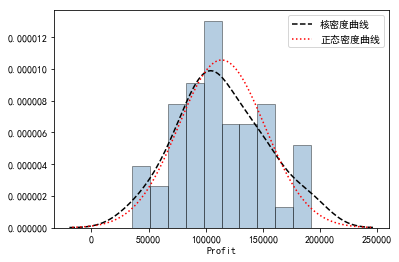

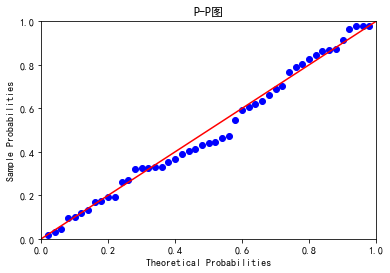

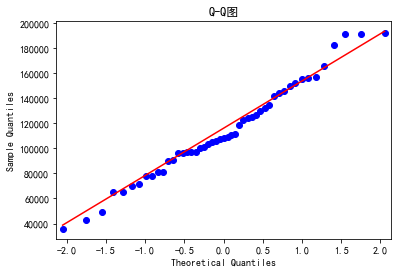

Shapiro检验: ShapiroResult(statistic=0.9793398380279541, pvalue=0.537902295589447)
K-S检验: KstestResult(statistic=0.007039202610658046, pvalue=0.701929280508784) KstestResult(statistic=0.058422600019767956, pvalue=4.126185902313871e-30)


In [10]:
# A.正态性检验
import scipy.stats as stats

# 1.直方图法
# 中文和负号的正常显示
plt.rcParams['font.sans-serif'] = ['simhei']
plt.rcParams['axes.unicode_minus'] = False
sns.distplot(a = Profit_New.Profit, bins = 10, fit = stats.norm, norm_hist = True,
             hist_kws = {'color':'steelblue', 'edgecolor':'black'}, 
             kde_kws = {'color':'black', 'linestyle':'--', 'label':'核密度曲线'}, 
             fit_kws = {'color':'red', 'linestyle':':', 'label':'正态密度曲线'})
plt.legend()
plt.show()

# 2.PP图和QQ图
pp_qq_plot = sm.ProbPlot(Profit_New.Profit)
pp_qq_plot.ppplot(line='45')
plt.title('P-P图')
pp_qq_plot.qqplot(line='q')
plt.title('Q-Q图')
plt.show()

# 3.Shapiro检验和K-S检验:
'''
这两种检验方法均属于非参数方法，它们的原假设被设定为变量服 从正态分布，
两者的最大区别在于适用的数据量不一样，若数据量低于 5000，
则使用shapiro检验法比较合理，否则使用K-S检验法。
'''
print('Shapiro检验:', stats.shapiro(Profit_New.Profit)) #第一个元素为统计量,第二个为概率值p, p>0.05,接受原假设,服从正态分布
# K-S检验例子
rnorm = np.random.normal(loc=5, scale=2, size=10000)
runif = np.random.uniform(low=1, high=100, size=10000)
KS_Test1 = stats.kstest(rvs=rnorm, args=(rnorm.mean(), rnorm.std()), cdf='norm')
KS_Test2 = stats.kstest(rvs=runif, args=(runif.mean(), runif.std()), cdf='norm')
print('K-S检验:', KS_Test1, KS_Test2)

In [11]:
# B.多重共线性检验 - 方差膨胀因子VIF来鉴定
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = sm.add_constant(Profit_New.loc[:, ['RD_Spend','Marketing_Spend']])
vif = pd.DataFrame()
vif['features'] = X.columns
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif #均小于10,说明不存在多重共线性

,features,VIF Factor
0,const,4.540984
1,RD_Spend,2.026141
2,Marketing_Spend,2.026141


RD_Spend           0.978437
Administration     0.205841
Marketing_Spend    0.739307
California        -0.083258
Florida            0.088008
dtype: float64


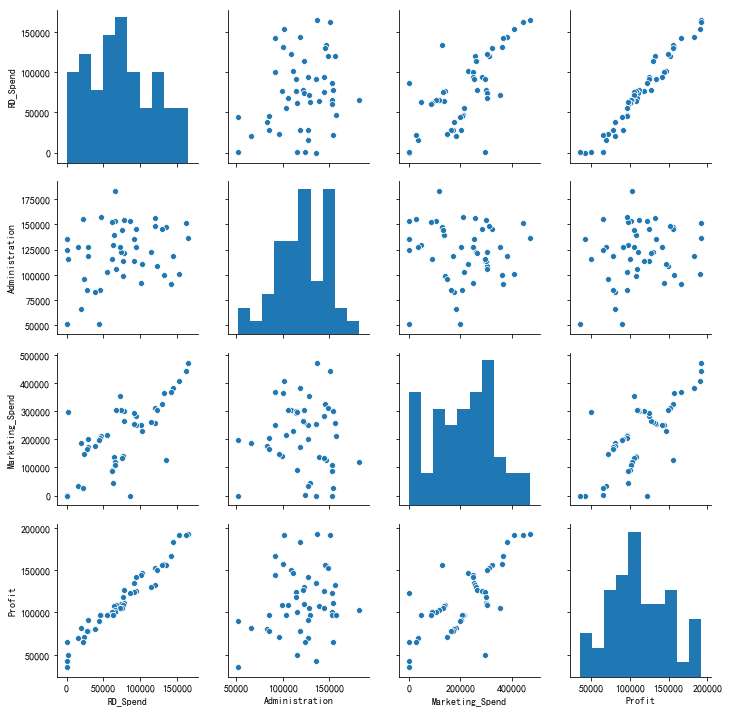

Intercept          51902.112471
RD_Spend               0.785116
Marketing_Spend        0.019402
dtype: float64

In [12]:
# C.线性相关性检验  # |p|>=0.8:高   0.5<=|p|<0.8:中   0.3<=|p|<0.5:低   |p|<0.3:无关
print(Profit_New.drop('Profit', axis=1).corrwith(Profit_New.Profit))

#绘制散点矩阵
sns.pairplot(Profit_New.loc[:, ['RD_Spend','Administration','Marketing_Spend','Profit']])
plt.show()

#模型修正
model3 = sm.formula.ols('Profit ~ RD_Spend + Marketing_Spend', data=train).fit()
model3.params

In [13]:
# D.异常值检验
outliers = model3.get_influence()

# 1.高杠杆值点（帽子矩阵）
leverage = outliers.hat_matrix_diag
# 2.dffits值
dffits = outliers.dffits[0]
# 3.学生化残差
resid_stu = outliers.resid_studentized_external # |resid_stu|>2时,数据异常
# 4.cook距离
cook = outliers.cooks_distance[0]
# 合并异常统计量
contat1 = pd.concat([pd.Series(leverage, name = 'leverage'),pd.Series(dffits, name = 'dffits'),
                     pd.Series(resid_stu,name = 'resid_stu'),pd.Series(cook, name = 'cook')], axis=1)
# 重设train数据的行索引
train.index = range(train.shape[0])
# 将上面的统计量与train数据集合并
profit_outliers = pd.concat([train, contat1], axis=1)
display(profit_outliers.head())

#异常比例
outliers_ratio = sum(np.where((np.abs(profit_outliers.resid_stu)>2), 1, 0))/ profit_outliers.shape[0]
print(outliers_ratio) #少于百分之5可排除
#排除异常点
none_outliers = profit_outliers.loc[np.abs(profit_outliers.resid_stu)<=2,]
# 应用无异常值的数据集重新建模
model4 = sm.formula.ols('Profit ~ RD_Spend + Marketing_Spend', data = none_outliers).fit()
model4.params

,RD_Spend,Administration,Marketing_Spend,Profit,California,Florida,leverage,dffits,resid_stu,cook
0,28663.76,127056.21,201126.82,90708.19,0,1,0.066517,0.466410,1.747255,0.068601
1,15505.73,127382.30,35534.17,69758.98,0,0,0.093362,0.221230,0.689408,0.016556
2,94657.16,145077.58,282574.31,125370.37,0,0,0.032741,-0.156225,-0.849138,0.008199
3,101913.08,110594.11,229160.95,146121.95,0,1,0.039600,0.270677,1.332998,0.023906
4,78389.47,153773.43,299737.29,111313.02,0,0,0.042983,-0.228563,-1.078496,0.017335


0.02564102564102564


Intercept          51827.416821
RD_Spend               0.797038
Marketing_Spend        0.017740
dtype: float64

In [14]:
# E.独立性检验 - Durbin-Watson值接近2
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     520.7
Date:                Thu, 23 Jul 2020   Prob (F-statistic):           9.16e-27
Time:                        19:25:34   Log-Likelihood:                -389.18
No. Observations:                  38   AIC:                             784.4
Df Residuals:                      35   BIC:                             789.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.183e+04   2501.192     20.721      0.000    4.67e+04    5.69e+04
RD_Spend            0.7970      0.034     23.261      0.000       0.727       0.867
Marketing_Spend     0.0177      0.013      1.391      0.173      -0.008       0.044
==============================================================================
Omnibus:                        7.188   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                2.744
Skew:                           0.321   Prob(JB):                        0.254
Kurtosis:                       1.851   Cond. No.                     5.75e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.75e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

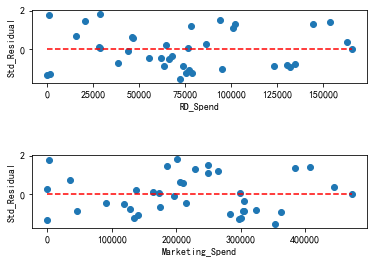

(1.467510366830809,
 0.48010272699006995,
 0.7029751237162342,
 0.5019659740962923)

In [15]:
# F.方差齐性检验

#1.图形法
ax1 = plt.subplot2grid(shape=(2,1), loc=(0,0))
ax1.scatter(none_outliers.RD_Spend, (model4.resid-model4.resid.mean())/model4.resid.std())
ax1.hlines(y=0, xmin=none_outliers.RD_Spend.min(), xmax = none_outliers.RD_Spend.max(), color = 'red', linestyles = '--')
ax1.set_xlabel('RD_Spend')
ax1.set_ylabel('Std_Residual')
ax2 = plt.subplot2grid(shape = (2,1), loc = (1,0))
ax2.scatter(none_outliers.Marketing_Spend, (model4.resid-model4.resid.mean())/model4.resid.std())
ax2.hlines(y = 0 ,xmin = none_outliers.Marketing_Spend.min(),xmax = none_outliers.Marketing_Spend.max(), color = 'red', linestyles = '--')
ax2.set_xlabel('Marketing_Spend')
ax2.set_ylabel('Std_Residual')
# 调整子图之间的水平间距和高度间距
plt.subplots_adjust(hspace=1, wspace=0.3)
plt.show()

#2.BP检验
sm.stats.diagnostic.het_breuschpagan(model4.resid, exog_het = model4.model.exog) #LM统计量,p,F统计量,p

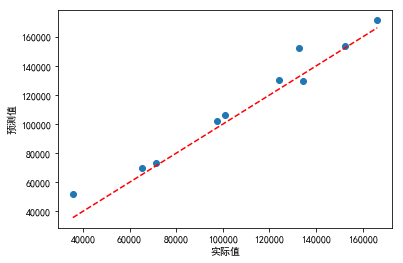

In [16]:
# 模型预测

pred4 = model4.predict(exog = test.loc[:, ['RD_Spend','Marketing_Spend']])
plt.scatter(x=test.Profit, y=pred4)
plt.plot([test.Profit.min(),test.Profit.max()],[test.Profit.min(),test.Profit.max()],
        color = 'red', linestyle = '--')
plt.xlabel('实际值')
plt.ylabel('预测值')
plt.show()